## 神经网络反向传播

### 案例：预测手写数数字。在这个练习中，你将实现反向传播算法来学习神经网络的参数。

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 

### 可视化数据

In [6]:
data = sio.loadmat('ml/ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
X = data['X']
y = data['y']
print(X.shape, y.shape)

(5000, 400) (5000, 1)


In [6]:
def plotAnImg(X):
    one = np.random.randint(5000)
    img = X[one,:]
    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(img.reshape(20,20), cmap = 'gray_r') #画图
    plt.xticks([]) #去掉刻度
    plt.yticks([])

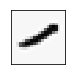

In [7]:
plotAnImg(X)

In [8]:
def plotHundredImg(X):
    index = np.random.choice(len(X), 100)
    imgs = X[index,:]
    print(imgs.shape)
    
    fig,ax = plt.subplots(ncols=10, nrows=10, figsize = (8, 8), sharex=True, sharey=True) #sharex去掉所有plot的刻度
    
    for r in range(10):
        for c in range(10):
            ax[r, c].imshow(imgs[10 * r + c].reshape(20,20).T, cmap = 'gray_r') #转置使得数字正着显示(疑问)
    
    plt.xticks([])
    plt.yticks([])
    plt.show

(100, 400)


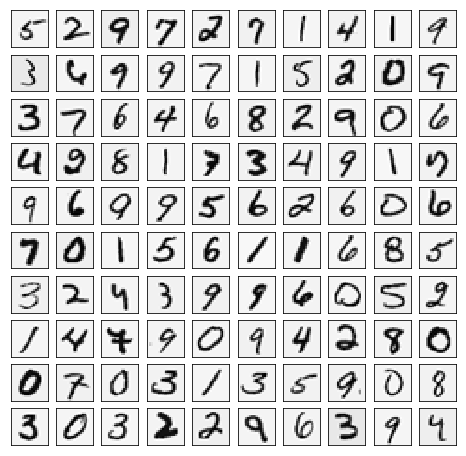

In [9]:
plotHundredImg(X)

### 前向传播

In [10]:
%%html
<img src = "ml/forward.png", width = 500, height = 300>

#### 构造数据集

In [9]:
X = np.insert(X, 0, values = 1, axis = 1) #axis等于1表示插入1列
X.shape

(5000, 401)

In [10]:
y = y.flatten()
y.shape #y降维，方便计算准确率

(5000,)

#### 读取权重

In [11]:
theta = sio.loadmat('ml/ex4weights.mat')
theta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [15]:
theta1 = theta['Theta1']
theta2 = theta['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [ ]:
def serialize(a, b):
  
    return np.concatenate((np.ravel(a), np.ravel(b)))
# 序列化2矩阵
# 在这个nn架构中，我们有theta1（25,401），theta2（10,26），它们的梯度是delta1，delta2

#### 前向传播

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def feedForward(theta, X):
    a1 = X
    z2 = a1 @ theta1.T
    a2 = np.insert(sigmoid(z2), 0, 1, axis = 1) #增加偏置单元
    z3 = a2 @ theta2.T
    a3 = sigmoid(z3)
    return a1, z2, a2, z3, a3

In [17]:
a1, z2, a2, z3, h = feedForward(theta, X)

In [20]:
h

array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
        4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
       [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
        2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
       [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
        6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
       ...,
       [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
        2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
       [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
        1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
       [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
        5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

### 反向传播

#### 输出层到隐含层的权值更新

In [21]:
%%html
<img src = "ml/back.png", width = 500, height = 300> <!--插入图片，code模式-->

In [22]:
%%html
<img src = "ml/sigmoid.gif", width = 500, height = 300>

输出层的误差可写成

In [23]:
%%html
<img src = "ml/out.png", width = 500, height = 300>

最后各部分求导相乘，整体误差可写成

In [24]:
%%html
<img src = "ml/al.png", width = 500, height = 300>

#### 隐含层到隐含层的权值更新

<font face="Menlo" > out(h1)会接受E(o1)和E(o2)两个地方传来的误差，所以这个地方两个都要计算

In [25]:
%%html
<img src = "ml/hide.png", width = 400, height = 200>

#### 损失函数

In [2]:
%%html
<img src = "ml/nn_cost.png", width = 500, height = 300>

In [37]:
def cost(theta, X, y):
    m = len(X)
    _, _, _, _, h = feedForward(theta, X)
    costs = -np.multiply(y, np.log(h)) - np.multiply(1 - y, np.log(1 - h)) #multiply 对应元素相乘，等同于*
    return costs.sum() / m

In [ ]:
def expand_y(y): #需要单步调试理解
#     """expand 5000*1 into 5000*10
#     where y=10 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]: ndarray
#     """
    res = []
    for i in y:
        y_array = np.zeros(10)
        y_array[i - 1] = 1

        res.append(y_array)

    return np.array(res)

In [35]:
from sklearn.preprocessing import OneHotEncoder #将结果编码成矩阵模式，便于做乘法
encoder = OneHotEncoder(sparse = False)
y = data['y']
y = encoder.fit_transform(y)
y.shape

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(5000, 10)

In [31]:
print (y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [38]:
cost(theta, X, y)

0.2876291651613189

#### 正则化损失函数

In [3]:
%%html
<img src = "ml/nn_regcost.png", width = 500, height = 300>

In [47]:
def regularizedCost(theta, X, y, re = 1):
    m = len(X)
    reg1 = (re / (2 * m)) * np.power(theta1[:, 1:] , 2).sum() #忽略第1列 注意优先级，2*m需要加括号
    reg2 = (re / (2 * m)) * np.power(theta2[:, 1:] , 2).sum()
    return cost(theta, X, y) + reg1 + reg2

In [48]:
regularizedCost(theta, X, y)

0.38376985909092365

#### 反向传播计算梯度

In [ ]:
def gradient(theta, X, y):
    